<h1 style="font-size:3rem;color:orange;">Setting up</h1>

In [42]:
import os

os.environ["DGLBACKEND"] = "pytorch"
import dgl
import dgl.data
import torch
print(torch.__version__)
import torch.nn as nn
import torch.nn.functional as F
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sn 
from tqdm import tqdm

#RDKit packages 
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.rdBase import _vectint #_vectint on Windows
from rdkit import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
# from rdkit.Chem import PandasTools 
AllChem.SetPreferCoordGen(True)
from rdkit.Chem import rdmolops

from typing import Dict, List, Optional, Tuple
from tqdm import tqdm
from pathlib import Path

import csv
import matplotlib.pyplot as plt
# %matplotlib inline

2.3.0+cpu


In [43]:
torch.__version__

'2.3.0+cpu'

In [44]:
import rdkit.rdBase
dir(rdkit.rdBase)

['AttachFileToLog',
 'BlockLogs',
 'DisableLog',
 'EnableLog',
 'LogDebugMsg',
 'LogErrorMsg',
 'LogInfoMsg',
 'LogMessage',
 'LogStatus',
 'LogToCppStreams',
 'LogToPythonLogger',
 'LogToPythonStderr',
 'LogWarningMsg',
 'SeedRandomNumberGenerator',
 'WrapLogs',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_iostreamsEnabled',
 '_listclass std::vector<int,class std::allocator<int> >',
 '_listclass std::vector<unsigned int,class std::allocator<unsigned int> >',
 '_listint',
 '_multithreadedEnabled',
 '_serializationEnabled',
 '_vectclass std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> >',
 '_vectclass std::vector<double,class std::allocator<double> >',
 '_vectclass std::vector<int,class std::allocator<int> >',
 '_vectclass std::vector<unsigned int,class std::allocator<unsigned int> >',
 '_vectdouble',
 '_vectint',
 '_vectunsigned int',
 '_version',
 'boostVersion',
 'ostream',
 'rdkitBuild',
 'rdkitVersion',
 'std_os

In [45]:
rdkit.rdBase.__file__

'C:\\Users\\jenif\\anaconda3\\envs\\py3.10.12\\lib\\site-packages\\rdkit\\rdBase.pyd'

In [46]:
# !pip install rdkit

In [47]:
import networkx as nx
import matplotlib.pyplot as plt
#%matplotlib inline

In [48]:
# !pip install dgllife

In [49]:
from dgllife.data import Tox21 
from dgllife.utils import SMILESToBigraph, CanonicalAtomFeaturizer, CanonicalBondFeaturizer
from dgllife.utils import mol_to_graph
from dgllife.utils import mol_to_bigraph

<h1 style="font-size:3rem;color:orange;">Dataset</h1>

In [50]:
# #Convert SMILES notation into graphs with initial featurizations for nodes and edges;
# #Load the dataset Tox21 with these graphs. 
# smiles_to_g = SMILESToBigraph(node_featurizer=CanonicalAtomFeaturizer())
# dataset = Tox21(smiles_to_g)

# graphs = [graph for graph in dataset]

# import dgl
# import os
# import torch

# save_path = './saved_tox21_dataset.pt'
# torch.save(dataset, save_path)



In [51]:
import torch
import dgl
import os

load_path = './saved_tox21_dataset.pt'
dataset = torch.load(load_path)
print(f"Dataset loaded from {load_path}")

Dataset loaded from ./saved_tox21_dataset.pt


In [52]:
# # Function to process and save the dataset
# def save_dataset():
#     smiles_to_g = SMILESToBigraph(node_featurizer=CanonicalAtomFeaturizer())
#     dataset = Tox21(smiles_to_g)
#     save_path = './saved_tox21_dataset.pt'
#     torch.save(dataset, save_path)
#     print(f"Dataset saved to {save_path}")

# # Function to load the saved dataset
# def load_dataset():
#     load_path = './saved_tox21_dataset.pt'
#     dataset = torch.load(load_path)
#     print(f"Dataset loaded from {load_path}")
#     return dataset

# # Uncomment to save the dataset
# save_dataset()

# # Uncomment to load the dataset
# # dataset = load_dataset()

In [53]:
# len(dataset)

## Without the parameter smiles_to_g, the graphs in Tox21 do not have any features.

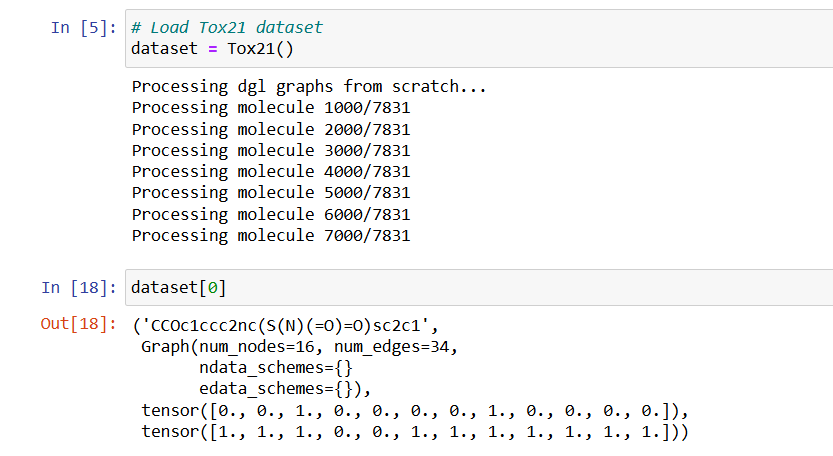

## Each datapoint in Tox21 is a tuple of 4 elements.

In [54]:
# dataset[0]
# #SMILES string at index 0
# #DGLgraph object at index 1
# #Label tensor at index 2 
# #Mask tensor at index 3 

In [55]:
# type(dataset[0])

In [56]:
# graph_obj = dataset[0][1] #Extracting the DGLgraph of the first molecule

In [57]:
# #Raw Tox21 dataset without any DGLgraphs. 
# df = pd.read_csv('tox21.csv')
# df.head(10)

## Addressing the imbalance between positive and negative samples 

In [58]:
# train_ids = torch.arange(1000)
# dataset.task_pos_weights(train_ids)

# Drawing a graph representation for each of the molecules. (dataset[0], dataset[1], etc.)

In [59]:
import pandas as pd
import numpy as np
import seaborn as sn 

#RDKit packages 
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
# from rdkit.Chem import PandasTools 
AllChem.SetPreferCoordGen(True)
from rdkit.Chem import rdmolops
import csv

In [60]:
import torch 
from rdkit import Chem
from dgllife.utils import mol_to_bigraph

In [61]:
# #Link: https://lifesci.dgl.ai/generated/dgllife.utils.mol_to_bigraph.html#dgllife.utils.mol_to_bigraph

# #Input: A molecule (mol)
# #Return: A dictionary containing features for each atom in the molecule. It extracts the atomic numbers of each atom in the molecule and constructs a sparse feature vector.

# def featurize_atoms(mol):
#     feats = []
#     for atom in mol.GetAtoms():
#         feats.append(atom.GetAtomicNum())
#     return {'atomic': torch.tensor(feats).reshape(-1, 1).float()}  

# #Convert feats (list) into a PyTorch tensor;
# #Reshape it into a column vector (tensor with 1 column)
# #Convert the data type of the atomic numbers to float
# #Store everything in a dictionary called "atomic"


# #Input: A molecule
# #Return: A dictionary containing features for each bond in the molecule. Note that every bond is included twice in the feature vector. 

# def featurize_bonds(mol):
#     feats = []
#     bond_types = [Chem.rdchem.BondType.SINGLE, Chem.rdchem.BondType.DOUBLE,  #enumeration value 
#                   Chem.rdchem.BondType.TRIPLE, Chem.rdchem.BondType.AROMATIC]
#     for bond in mol.GetBonds():
#         btype = bond_types.index(bond.GetBondType())
#         # One bond between atom u and v corresponds to two edges (u, v) and (v, u). Dataset[0][1] has 17 bonds and 34 edges. 
#         feats.extend([btype, btype])
#     return {'type': torch.tensor(feats).reshape(-1, 1).float()}

# #Append vs. extend:
# #In summary, append() adds a single element (or an iterable as a single element) to the end of the list, 
# #while extend() adds all the elements from an iterable to the end of the list individually. 
# #The choice between append() and extend() depends on whether you want to add a single element or multiple elements to the list.


In [62]:
# mol = Chem.MolFromSmiles(dataset[0][0])
# g = mol_to_bigraph(mol, node_featurizer=featurize_atoms, edge_featurizer=featurize_bonds)

In [63]:
# print(g.ndata['atomic'])
# #print(g.ndata)
# print(len(g.ndata['atomic']))

In [64]:
# print(g.edata['type'])

In [65]:
# #h is a graph created by using the function SMILESToBiGraph()
# h = dataset[0][1]
# print(h.ndata['h'].shape)
# print(h.ndata)
# print(h.edata['e'].shape)
# print(h.edata)

In [66]:
# h.ndata

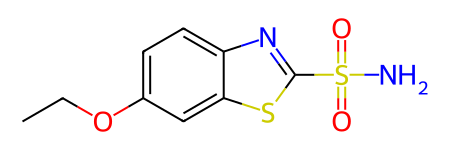

In [67]:
mol = Chem.MolFromSmiles(dataset[0][0])
mol

In [68]:
# Draw.MolToImage(mol)

In [69]:
# Draw.MolsToGridImage(mol_list)

In [70]:
# nx_graph = dgl.to_networkx(dataset[0][1])

In [71]:
# print(nx_graph.nodes(data=True))
# print(nx_graph.edges(data=True))

In [72]:
# G = nx.Graph()
# G.add_nodes_from(nx_graph.nodes(data=True))
# G.add_edges_from(nx_graph.edges(data=True))
# nx.draw(G, with_labels=True)

In [73]:
# G.nodes()

In [74]:
# G.edges()

In [75]:
# SMILES_list = dataset[:][0]
# print(SMILES_list)

In [76]:
# get ring structure

In [77]:
for x in Chem.GetSymmSSSR(mol):
    for i in x:
        print(i)
    print()
    
print(len(Chem.GetSymmSSSR(mol)))
print(type(Chem.GetSymmSSSR(mol)))
#n RDKit, _vectint is a specialized type used to represent integer vectors. 
#It's commonly used for storing indices, such as the indices of atoms in a ring or in other structures.


3
15
14
6
5
4

7
6
14
13
8

2
<class 'rdkit.rdBase._vectclass std::vector<int,class std::allocator<int> >'>


In [78]:
import networkx as nx

In [79]:
# import networkx as nx
# nx_graph1 = dgl.to_networkx(dataset[1][1])
# print(nx_graph1)
# print(nx_graph1.nodes(data=True))
# print(nx_graph1.edges(data=True))

In [80]:
# G1 = nx.Graph()
# G1.add_nodes_from(nx_graph1.nodes(data=True))
# G1.add_edges_from(nx_graph1.edges(data=True))

In [81]:
# nx.draw(G1, with_labels=True)

<h1 style="font-size:3rem;color:orange">Tree Decomposition</h1>

## Download chemutils from GitHub then run the text file from terminal. 

In [82]:
# !pip install rdkit

In [83]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.rdBase import _vectint

In [84]:
#Link: mi_collections is a GitHub folder: https://github.com/Masatsugar/graph-decomposition-reassembling/blob/main/mi-collections/mi_collections/chemutils.py

## Tree Decomposition 

In [85]:
#Link: https://github.com/Masatsugar/graph-decomposition-reassembling/blob/main/mi-collections/mi_collections/moldr/moltree.py

from collections import defaultdict
from dgllife.utils.jtvae.chemutils import enum_assemble
from chemutils import get_clique_mol, get_mol, get_smiles, set_atommap
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

MST_MAX_WEIGHT = 100
MAX_NCAND = 2000


def tree_decomp(mol):
    n_atoms = mol.GetNumAtoms()
    if n_atoms == 1:
        return [[0]], []

    cliques = []
    for bond in mol.GetBonds():
        a1 = bond.GetBeginAtom().GetIdx()
        a2 = bond.GetEndAtom().GetIdx()
        if not bond.IsInRing():
            cliques.append([a1, a2])

    ssr = [x for x in Chem.GetSymmSSSR(mol)]
    cliques.extend(ssr)

    nei_list = [[] for i in range(n_atoms)]
    for i in range(len(cliques)):
        for atom in cliques[i]:
            nei_list[atom].append(i)
    

# Merge Rings with intersection > 2 atoms
    for i in range(len(cliques)):
        if len(cliques[i]) <= 2:
            continue
        for atom in cliques[i]:
            for j in nei_list[atom]:
                if i >= j or len(cliques[j]) <= 2:
                    continue
                inter = set(cliques[i]) & set(cliques[j])
                if len(inter) > 2:
                    cliques[i].extend(cliques[j])
                    cliques[i] = list(set(cliques[i]))
                    cliques[j] = []

    cliques = [c for c in cliques if len(c) > 0]
    nei_list = [[] for i in range(n_atoms)]
    for i in range(len(cliques)):
        for atom in cliques[i]:
            nei_list[atom].append(i)

    # Build edges and add singleton cliques
    edges = defaultdict(int)
    for atom in range(n_atoms):
        if len(nei_list[atom]) <= 1:
            continue
        cnei = nei_list[atom]
        bonds = [c for c in cnei if len(cliques[c]) == 2]
        rings = [c for c in cnei if len(cliques[c]) > 4]
        # In general, if len(cnei) >= 3, a singleton should be added, but 1 bond + 2 ring is currently not dealt with.
        if len(bonds) > 2 or (len(bonds) == 2 and len(cnei) > 2):
            cliques.append([atom])
            c2 = len(cliques) - 1
            for c1 in cnei:
                edges[(c1, c2)] = 1
        elif len(rings) > 2:  # Multiple (n>2) complex rings
            cliques.append([atom])
            c2 = len(cliques) - 1
            for c1 in cnei:
                edges[(c1, c2)] = MST_MAX_WEIGHT - 1
        else:
            for i in range(len(cnei)):
                for j in range(i + 1, len(cnei)):
                    c1, c2 = cnei[i], cnei[j]
                    inter = set(cliques[c1]) & set(cliques[c2])
                    if edges[(c1, c2)] < len(inter):
                        edges[(c1, c2)] = len(
                            inter
                        )  # cnei[i] < cnei[j] by construction

    edges = [u + (MST_MAX_WEIGHT - v,) for u, v in edges.items()]
    if len(edges) == 0:
        return cliques, edges

    # Compute Maximum Spanning Tree
    row, col, data = (zip(*edges))
#     print(row)
#     print(col)
#     print(data)
    n_clique = len(cliques)
    clique_graph = csr_matrix((data, (row, col)), shape=(n_clique, n_clique))
    junc_tree = minimum_spanning_tree(clique_graph)
    row, col = junc_tree.nonzero()
    edges = [(row[i], col[i]) for i in range(len(row))]
    
#     # Iterate through cliques and print atoms
    for clique in cliques:
        if isinstance(clique, list):
            # If clique is a list, directly print its content
            print("Atoms in clique:", clique)
        elif isinstance(clique, _vectint):
            # If clique is an RDKit _vectint object, convert it to list and print
            atom_indices = list(clique)
            print("Atoms in RDKit _vectint:", atom_indices)
        # Access atoms in the molecule using atom_indices
        # For example, if mol is your RDKit molecule object
        # atoms = [mol.GetAtomWithIdx(atom_idx) for atom_idx in atom_indices]
        # print("Atom objects in RDKit _vectint:", atoms)
        else:
            print("Unknown type found in cliques.")
            
    return (cliques, edges)
  


class MolTreeNode(object):
    def __init__(self, smiles, clique=[]):
        self.smiles = smiles
        self.mol = get_mol(self.smiles)

        self.clique = [x for x in clique]  # create a copy of the 'clique' passed in 
        self.neighbors = []  #where neighboring MolTreeNode objects will be stored 

    def add_neighbor(self, nei_node):
        self.neighbors.append(nei_node)  #nei_node is a neighboring MolTreeNode object

    def recover(self, original_mol):
        clique = []
        clique.extend(self.clique)
        if not self.is_leaf:  #I don't see .is_leaf() defined anywhere. 
            for cidx in self.clique:
                original_mol.GetAtomWithIdx(cidx).SetAtomMapNum(self.nid)
                #This sets the atom map number of each atom in this clique (node) to the node's id. 
                #So, all atoms in the same clique will share the same id now. 

        for nei_node in self.neighbors:
            clique.extend(nei_node.clique)
            if nei_node.is_leaf:  # Leaf node, no need to mark
                continue
            for cidx in nei_node.clique:
                # allow singleton node override the atom mapping
                if cidx not in self.clique or len(nei_node.clique) == 1:
                    atom = original_mol.GetAtomWithIdx(cidx)
                    atom.SetAtomMapNum(nei_node.nid)

        clique = list(set(clique))
        label_mol = get_clique_mol(original_mol, clique)
        self.label = Chem.MolToSmiles(Chem.MolFromSmiles(get_smiles(label_mol)))

        for cidx in clique:
            original_mol.GetAtomWithIdx(cidx).SetAtomMapNum(0)

        return self.label

    def assemble(self):
        neighbors = [nei for nei in self.neighbors if nei.mol.GetNumAtoms() > 1]
        neighbors = sorted(neighbors, key=lambda x: x.mol.GetNumAtoms(), reverse=True)
        singletons = [nei for nei in self.neighbors if nei.mol.GetNumAtoms() == 1]
        neighbors = singletons + neighbors

        cands, aroma = enum_assemble(self, neighbors)
        new_cands = [cand for i, cand in enumerate(cands) if aroma[i] >= 0]
        if len(new_cands) > 0:
            cands = new_cands

        if len(cands) > 0:
            self.cands, _ = zip(*cands)
            self.cands = list(self.cands)
        else:
            self.cands = []


class MolTree(object):
    def __init__(self, smiles):
        self.smiles = smiles
        self.mol = get_mol(smiles)

        # Stereo Generation (currently disabled)
        # mol = Chem.MolFromSmiles(smiles)
        # self.smiles3D = Chem.MolToSmiles(mol, isomericSmiles=True)
        # self.smiles2D = Chem.MolToSmiles(mol)
        # self.stereo_cands = decode_stereo(self.smiles2D)

        cliques, edges = tree_decomp(self.mol)
        self.nodes = []
        self.cliques = cliques
        self.edges = edges

        root = 0
        for i, c in enumerate(cliques):
            cmol = get_clique_mol(self.mol, c)
            node = MolTreeNode(get_smiles(cmol), c)
            self.nodes.append(node)
            if min(c) == 0:
                root = i

        for x, y in edges:
            self.nodes[x].add_neighbor(self.nodes[y])
            self.nodes[y].add_neighbor(self.nodes[x])

        if root > 0:
            self.nodes[0], self.nodes[root] = self.nodes[root], self.nodes[0]

        for i, node in enumerate(self.nodes):
            node.nid = i + 1
            if len(node.neighbors) > 1:  # Leaf node mol is not marked
                set_atommap(node.mol, node.nid)
            node.is_leaf = len(node.neighbors) == 1

    def size(self):
        return len(self.nodes)

    def recover(self):
        for node in self.nodes:
            node.recover(self.mol)

    def assemble(self):
        for node in self.nodes:
            node.assemble()

In [86]:
# # turn entire dataset of smiles into RDKit mols
# mol_list = []
# for i in range(len(dataset)):
#     mol = Chem.MolFromSmiles(dataset[i][0])
#     mol_list.append(mol)

In [87]:
# Sanitize molecules

In [88]:
from rdkit import Chem
from rdkit.Chem import MolStandardize

def sanitize_molecule(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        print(f"Invalid SMILES: {smiles}")
        return None
    try:
        Chem.SanitizeMol(mol)
        return mol
    except Exception as e:
        print(f"Sanitization failed for SMILES: {smiles} with error: {e}")
        return None

jt_list = []
for smiles in smiles_list[0:1000]:
    mol = sanitize_molecule(smiles)
    if mol is not None:
        try:
            mol_tree = MolTree(smiles)
            jt_list.append(mol_tree)
        except Exception as e:
            print(f"Failed to process SMILES: {smiles} with error: {e}")

# Printing number of nodes
print(f"Number of nodes: {len(jt_list)}")


Atoms in clique: [0, 1]
Atoms in clique: [1, 2]
Atoms in clique: [2, 3]
Atoms in clique: [8, 9]
Atoms in clique: [9, 10]
Atoms in clique: [9, 11]
Atoms in clique: [9, 12]
Atoms in RDKit _vectint: [3, 15, 14, 6, 5, 4]
Atoms in RDKit _vectint: [7, 6, 14, 13, 8]
Atoms in clique: [9]
Atoms in clique: [0, 1]
Atoms in clique: [1, 2]
Atoms in clique: [3, 4]
Atoms in clique: [6, 7]
Atoms in clique: [13, 14]
Atoms in RDKit _vectint: [2, 3, 5, 6, 13]
Atoms in RDKit _vectint: [8, 9, 10, 11, 12, 7]
Atoms in clique: [0, 1]
Atoms in clique: [1, 2]
Atoms in clique: [2, 3]
Atoms in clique: [19, 20]
Atoms in RDKit _vectint: [2, 4, 5, 6, 19]
Atoms in RDKit _vectint: [8, 9, 10, 15, 16, 7]
Atoms in RDKit _vectint: [11, 12, 13, 14, 15, 10]
Atoms in RDKit _vectint: [17, 18, 19, 6, 7, 16]
Atoms in clique: [2]
Atoms in clique: [0, 1]
Atoms in clique: [1, 2]
Atoms in clique: [2, 3]
Atoms in clique: [3, 4]
Atoms in clique: [4, 5]
Atoms in clique: [3, 6]
Atoms in clique: [6, 7]
Atoms in clique: [7, 8]
Atoms in c

In [102]:
from rdkit import Chem
from rdkit.Chem import MolStandardize

def sanitize_molecule(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        print(f"Invalid SMILES: {smiles}")
        return None
    try:
        Chem.SanitizeMol(mol)
        return mol
    except Exception as e:
        print(f"Sanitization failed for SMILES: {smiles} with error: {e}")
        return None

def write_problematic_smiles(smiles, filename):
    with open(filename, 'a') as file:
        file.write(smiles + '\n')

problematic_file = 'problematic_smilesfull.txt'
jt_list = []

for smiles in smiles_list:
    mol = sanitize_molecule(smiles)
    if mol is not None:
        try:
            mol_tree = MolTree(smiles)
            jt_list.append(mol_tree)
        except Exception as e:
            print(f"Failed to process SMILES: {smiles} with error: {e}")
            write_problematic_smiles(smiles, problematic_file)

# Printing number of nodes
print(f"Number of nodes: {len(jt_list)}")
print(f"Problematic SMILES written to {problematic_file}")


Atoms in clique: [0, 1]
Atoms in clique: [1, 2]
Atoms in clique: [2, 3]
Atoms in clique: [8, 9]
Atoms in clique: [9, 10]
Atoms in clique: [9, 11]
Atoms in clique: [9, 12]
Atoms in RDKit _vectint: [3, 15, 14, 6, 5, 4]
Atoms in RDKit _vectint: [7, 6, 14, 13, 8]
Atoms in clique: [9]
Atoms in clique: [0, 1]
Atoms in clique: [1, 2]
Atoms in clique: [3, 4]
Atoms in clique: [6, 7]
Atoms in clique: [13, 14]
Atoms in RDKit _vectint: [2, 3, 5, 6, 13]
Atoms in RDKit _vectint: [8, 9, 10, 11, 12, 7]
Atoms in clique: [0, 1]
Atoms in clique: [1, 2]
Atoms in clique: [2, 3]
Atoms in clique: [19, 20]
Atoms in RDKit _vectint: [2, 4, 5, 6, 19]
Atoms in RDKit _vectint: [8, 9, 10, 15, 16, 7]
Atoms in RDKit _vectint: [11, 12, 13, 14, 15, 10]
Atoms in RDKit _vectint: [17, 18, 19, 6, 7, 16]
Atoms in clique: [2]
Atoms in clique: [0, 1]
Atoms in clique: [1, 2]
Atoms in clique: [2, 3]
Atoms in clique: [3, 4]
Atoms in clique: [4, 5]
Atoms in clique: [3, 6]
Atoms in clique: [6, 7]
Atoms in clique: [7, 8]
Atoms in c

In [131]:
dir(jt_list)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [135]:
len(jt_list)

7716

In [103]:
def load_problematic_smiles(filename):
    with open(filename, 'r') as file:
        smiles_list = file.read().splitlines()
    return smiles_list

# Load the problematic SMILES from the file into a variable
problematic_smiles = load_problematic_smiles('problematic_smiles.txt')

# Print the loaded SMILES strings
print("Loaded problematic SMILES:")
for smiles in problematic_smiles:
    print(smiles)


Loaded problematic SMILES:
COc1ccc2cc1Oc1cc3c(cc1OC)CC[N+](C)(C)[C@H]3Cc1ccc(cc1)Oc1c(OC)c(OC)cc3c1[C@@H](C2)[N+](C)(C)CC3
Cc1nnc2n1-c1sc(CCC(=O)N3CCOCC3)cc1C(c1ccccc1Cl)=NC2
COc1cc2c3cc1Oc1cc(ccc1O)C[C@@H]1c4c(cc(OC)c(O)c4Oc4ccc(cc4)C[C@@H]3N(C)CC2)CC[N+]1(C)C
CC(C)(C)OC(=O)c1ncn2c1[C@@H]1CCCN1C(=O)c1c(Br)cccc1-2
Cc1ccccc1N1CCN(CCc2nnc3n2CCCC3)CC1
Cc1c2oc3c(C)ccc(C(=O)N[C@@H]4C(=O)N[C@H](C(C)C)C(=O)N5CCC[C@H]5C(=O)N(C)CC(=O)N(C)[C@@H](C(C)C)C(=O)O[C@@H]4C)c3nc-2c(C(=O)N[C@@H]2C(=O)N[C@H](C(C)C)C(=O)N3CCC[C@H]3C(=O)N(C)CC(=O)N(C)[C@@H](C(C)C)C(=O)O[C@@H]2C)c(N)c1=O
CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2
O=c1c(=O)c2cccc3cccc1c32
CCc1cc(S(=O)(=O)[O-])c2cc(C(C)C)cccc1-2
NC(CO)(CO)CO.O=C(c1ccccc1)c1ccc2n1CC[C@H]2C(=O)O
Cc1nc2sccn2c(=O)c1CCN1CCC(=C(c2ccc(F)cc2)c2ccc(F)cc2)CC1
CCCc1nc(C)c2c(=O)nc(-c3cc(S(=O)(=O)N4CCN(CC)CC4)ccc3OCC)[nH]n12.O=C(O)CC(O)(CC(=O)O)C(=O)O
O=C1c2ccccc2-c2n[nH]c3cccc1c23
COc1cc(C(C)C)c2c(c1)S(=O)(=O)N(COc1cc(=O)n3cccc(OCCN4CCCCC4)c3n1)C2=O
COc1cc2c(cc1OC)-c1c/c(=N\

In [105]:
# try to fix the kekulize problem
from rdkit import Chem
from rdkit.Chem import AllChem

pjt_list = []

def try_kekulize(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        print(f"Invalid SMILES: {smiles}")
        return None
    try:
        Chem.SanitizeMol(mol)
    except Exception as e:
        print(f"Sanitization failed for SMILES: {smiles} with error: {e}")
        return None
    
    try:
        # Attempt to Kekulize the molecule
        Chem.Kekulize(mol, clearAromaticFlags=True)
        print(f"Successfully kekulized: {smiles}")
        return mol
    except Exception as e:
        print(f"Kekulization failed for SMILES: {smiles} with error: {e}")
        return None

problem_smiles_list = load_problematic_smiles('problematic_smiles.txt')

for psmiles in problem_smiles_list:
    mol = try_kekulize(psmiles)
    if mol is not None:
        mol_tree = MolTree(psmiles)
        pjt_list.append(mol_tree)
    else:
        print("Failed to process the molecule.")

# Printing number of nodes
print(f"Number of nodes: {len(pjt_list)}")

# smiles = 'Cc1nn(c2)n1-(c1)sc(CCC(=O)N3CCOCC3)c(c1)C(c1ccccc1Cl)=NC2'
# mol = try_kekulize(smiles)

# if mol is not None:
#     mol_tree = MolTree(smiles)
#     jt_list.append(mol_tree)
# else:
#     print("Failed to process the molecule.")

# # Printing number of nodes
# print(f"Number of nodes: {len(jt_list)}")


Successfully kekulized: COc1ccc2cc1Oc1cc3c(cc1OC)CC[N+](C)(C)[C@H]3Cc1ccc(cc1)Oc1c(OC)c(OC)cc3c1[C@@H](C2)[N+](C)(C)CC3
Atoms in clique: [0, 1]
Atoms in clique: [1, 2]
Atoms in clique: [14, 15]
Atoms in clique: [15, 16]
Atoms in clique: [19, 20]
Atoms in clique: [19, 21]
Atoms in clique: [32, 33]
Atoms in clique: [33, 34]
Atoms in clique: [35, 36]
Atoms in clique: [36, 37]
Atoms in clique: [43, 44]
Atoms in clique: [43, 45]
Atoms in clique: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 40, 41, 42]
Atoms in RDKit _vectint: [10, 11, 12, 13, 14, 9]
Atoms in RDKit _vectint: [17, 18, 19, 22, 11, 12]
Atoms in RDKit _vectint: [25, 26, 27, 28, 29, 24]
Atoms in RDKit _vectint: [32, 35, 38, 39, 40, 31]
Atoms in RDKit _vectint: [43, 46, 47, 39, 40, 41]
Atoms in clique: [11]
Atoms in clique: [19]
Atoms in clique: [40]
Atoms in clique: [43]


KekulizeException: Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 9 10 11 24 25 26 27 28 29 31 40

In [115]:
# from rdkit import Chem
# from rdkit.Chem import AllChem

# def manually_adjust_aromaticity(mol, atoms):
#     for atom_idx in atoms:
#         atom = mol.GetAtomWithIdx(atom_idx)
#         atom.SetIsAromatic(False)  # Clear aromaticity flag for all atoms in the clique

#     for atom_idx in atoms:
#         atom = mol.GetAtomWithIdx(atom_idx)
#         for neighbor in atom.GetNeighbors():
#             bond = mol.GetBondBetweenAtoms(atom.GetIdx(), neighbor.GetIdx())
#             bond.SetIsAromatic(False)  # Clear aromaticity flag for all bonds in the clique
#     return mol

# def process_problematic_smiles(smiles):
#     try:
#         mol = Chem.MolFromSmiles(smiles)
#         if mol is None:
#             print(f"Invalid SMILES: {smiles}")
#             return None
#         Chem.SanitizeMol(mol)
#         Chem.Kekulize(mol, clearAromaticFlags=True)
#         return mol
#     except Exception as e:
#         print(f"Initial kekulization failed for SMILES: {smiles} with error: {e}")
#         # Attempt manual adjustment of aromaticity
#         try:
#             mol = Chem.MolFromSmiles(smiles)
#             manually_adjust_aromaticity(mol, [atom.GetIdx() for atom in mol.GetAtoms()])
#             Chem.SanitizeMol(mol)
#             Chem.Kekulize(mol, clearAromaticFlags=True)
#             print(f"Successfully manually adjusted and kekulized: {smiles}")
#             return mol
#         except Exception as e:
#             print(f"Manual adjustment failed for SMILES: {smiles} with error: {e}")
#             return None


# from rdkit.Chem import rdchem

# def load_problematic_smiles(filename):
#     with open(filename, 'r') as file:
#         smiles_list = file.read().splitlines()
#     return smiles_list

# def write_problematic_smiles(smiles, filename):
#     with open(filename, 'a') as file:
#         file.write(smiles + '\n')

# # Load the problematic SMILES from the file into a variable
# problematic_smiles = load_problematic_smiles('problematic_smiles.txt')

# # List to store successfully processed problematic junction trees
# pjt_list = []

# for psmiles in problematic_smiles:
#     mol = process_problematic_smiles(psmiles)
#     if mol is not None:
#         try:
#             mol_tree = MolTree(psmiles)
#             pjt_list.append(mol_tree)
#         except Exception as e:
#             print(f"Failed to process SMILES: {psmiles} even after manual adjustment, with error: {e}")
#             write_problematic_smiles(psmiles, 'still_problematic_smiles.txt')

# # Printing number of successfully processed nodes
# print(f"Number of successfully processed nodes from problematic cases: {len(pjt_list)}")
# print(f"Still problematic SMILES written to 'still_problematic_smiles.txt'")


Atoms in clique: [0, 1]
Atoms in clique: [1, 2]
Atoms in clique: [14, 15]
Atoms in clique: [15, 16]
Atoms in clique: [19, 20]
Atoms in clique: [19, 21]
Atoms in clique: [32, 33]
Atoms in clique: [33, 34]
Atoms in clique: [35, 36]
Atoms in clique: [36, 37]
Atoms in clique: [43, 44]
Atoms in clique: [43, 45]
Atoms in clique: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 40, 41, 42]
Atoms in RDKit _vectint: [10, 11, 12, 13, 14, 9]
Atoms in RDKit _vectint: [17, 18, 19, 22, 11, 12]
Atoms in RDKit _vectint: [25, 26, 27, 28, 29, 24]
Atoms in RDKit _vectint: [32, 35, 38, 39, 40, 31]
Atoms in RDKit _vectint: [43, 46, 47, 39, 40, 41]
Atoms in clique: [11]
Atoms in clique: [19]
Atoms in clique: [40]
Atoms in clique: [43]
Failed to process SMILES: COc1ccc2cc1Oc1cc3c(cc1OC)CC[N+](C)(C)[C@H]3Cc1ccc(cc1)Oc1c(OC)c(OC)cc3c1[C@@H](C2)[N+](C)(C)CC3 even after manual adjustment, with error: Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 9 10 11 24 25 26 27 28 29 31 40
Atoms

In [110]:
# # more tests
# from rdkit import Chem
# from rdkit.Chem import AllChem

# def get_clique_mol(mol, atoms):
#     smiles = Chem.MolFragmentToSmiles(mol, atoms, kekuleSmiles=True)
#     new_mol = Chem.MolFromSmiles(smiles, sanitize=False)
#     new_mol = Chem.EditableMol(new_mol).GetMol()
#     return new_mol

# def try_kekulize_clique(mol, atoms):
#     try:
#         clique_mol = get_clique_mol(mol, atoms)
#         Chem.SanitizeMol(clique_mol)
#         Chem.Kekulize(clique_mol, clearAromaticFlags=True)
#         print(f"Successfully kekulized clique: {atoms}")
#         return clique_mol
#     except Exception as e:
#         print(f"Kekulization failed for clique {atoms} with error: {e}")
#         return None

# smiles = 'Cc1nnc2n1-c1sc(CCC(=O)N3CCOCC3)cc1C(c1ccccc1Cl)=NC2'
# mol = Chem.MolFromSmiles(smiles)

# # Assuming cliques are defined somewhere
# cliques = [
#     [0, 1],
#     [8, 9],
#     [9, 10],
#     [10, 11],
#     [11, 12],
#     [11, 13],
#     [21, 22],
#     [27, 28],
#     [1, 2, 3, 4, 5],
#     [7, 6, 20, 19, 8],
#     [14, 15, 16, 17, 18, 13],
#     [23, 24, 25, 26, 27, 22],
#     [29, 21, 20, 6, 5, 4, 30],
#     [11]
# ]

# for clique in cliques:
#     print(f"Processing clique: {clique}")
#     clique_mol = try_kekulize_clique(mol, clique)
#     if clique_mol:
#         print(f"Successfully processed clique: {clique}")
#     else:
#         print(f"Failed to process clique: {clique}")

# # Printing number of nodes
# print(f"Number of nodes: {len(jt_list)}")


Processing clique: [0, 1]
Successfully kekulized clique: [0, 1]
Successfully processed clique: [0, 1]
Processing clique: [8, 9]
Successfully kekulized clique: [8, 9]
Successfully processed clique: [8, 9]
Processing clique: [9, 10]
Successfully kekulized clique: [9, 10]
Successfully processed clique: [9, 10]
Processing clique: [10, 11]
Successfully kekulized clique: [10, 11]
Successfully processed clique: [10, 11]
Processing clique: [11, 12]
Successfully kekulized clique: [11, 12]
Successfully processed clique: [11, 12]
Processing clique: [11, 13]
Successfully kekulized clique: [11, 13]
Successfully processed clique: [11, 13]
Processing clique: [21, 22]
Successfully kekulized clique: [21, 22]
Successfully processed clique: [21, 22]
Processing clique: [27, 28]
Successfully kekulized clique: [27, 28]
Successfully processed clique: [27, 28]
Processing clique: [1, 2, 3, 4, 5]
Successfully kekulized clique: [1, 2, 3, 4, 5]
Successfully processed clique: [1, 2, 3, 4, 5]
Processing clique: [7,

In [122]:
# more testing

# more tests
from rdkit import Chem
from rdkit.Chem import AllChem

def manually_adjust_aromaticity(mol, atoms):
    for atom_idx in atoms:
        atom = mol.GetAtomWithIdx(atom_idx)
        atom.SetIsAromatic(False)  # Clear aromaticity flag for all atoms in the clique

    for atom_idx in atoms:
        atom = mol.GetAtomWithIdx(atom_idx)
        for neighbor in atom.GetNeighbors():
            bond = mol.GetBondBetweenAtoms(atom.GetIdx(), neighbor.GetIdx())
            bond.SetIsAromatic(False)  # Clear aromaticity flag for all bonds in the clique
    return mol

def process_problematic_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            print(f"Invalid SMILES: {smiles}")
            return None
        Chem.SanitizeMol(mol)
        Chem.Kekulize(mol, clearAromaticFlags=True)
        return mol
    except Exception as e:
        print(f"Initial kekulization failed for SMILES: {smiles} with error: {e}")
        # Attempt manual adjustment of aromaticity
        try:
            mol = Chem.MolFromSmiles(smiles)
            manually_adjust_aromaticity(mol, [atom.GetIdx() for atom in mol.GetAtoms()])
            Chem.SanitizeMol(mol)
            Chem.Kekulize(mol, clearAromaticFlags=True)
            print(f"Successfully manually adjusted and kekulized: {smiles}")
            return mol
        except Exception as e:
            print(f"Manual adjustment failed for SMILES: {smiles} with error: {e}")
            return None


from rdkit.Chem import rdchem

def load_problematic_smiles(filename):
    with open(filename, 'r') as file:
        smiles_list = file.read().splitlines()
    return smiles_list

def write_problematic_smiles(smiles, filename):
    with open(filename, 'a') as file:
        file.write(smiles + '\n')
def get_clique_mol(mol, atoms):
    smiles = Chem.MolFragmentToSmiles(mol, atoms, kekuleSmiles=True)
    new_mol = Chem.MolFromSmiles(smiles, sanitize=False)
    new_mol = Chem.EditableMol(new_mol).GetMol()
    return new_mol

def try_kekulize_clique(mol, atoms):
    try:
        clique_mol = get_clique_mol(mol, atoms)
        Chem.SanitizeMol(clique_mol)
        Chem.Kekulize(clique_mol, clearAromaticFlags=True)
        print(f"Successfully kekulized clique: {atoms}")
        return clique_mol
    except Exception as e:
        print(f"Kekulization failed for clique {atoms} with error: {e}")
        return None

# successful kekulization
from rdkit.Chem import rdchem

def manually_adjust_clique(mol, atoms):
    editable_mol = Chem.EditableMol(mol)
    # Example adjustments (replace with actual needed adjustments)
    # editable_mol.RemoveBond(atom1_idx, atom2_idx)
    # editable_mol.AddBond(atom1_idx, atom2_idx, bond_order)
    adjusted_mol = editable_mol.GetMol()
    return adjusted_mol


# List to store successfully processed problematic junction trees
pjt_list = []

# for psmiles in problematic_smiles:
#     mol = process_problematic_smiles(psmiles)
#     if mol is not None:
#         try:
#             mol_tree = MolTree(psmiles)
#             pjt_list.append(mol_tree)
#         except Exception as e:
#             print(f"Failed to process SMILES: {psmiles} even after manual adjustment, with error: {e}")
#             write_problematic_smiles(psmiles, 'still_problematic_smiles.txt')

# # Printing number of successfully processed nodes
# print(f"Number of successfully processed nodes from problematic cases: {len(pjt_list)}")
# print(f"Still problematic SMILES written to 'still_problematic_smiles.txt'")



# load in problem cliques
# Load the problematic SMILES from the file into a variable
problematic_smiles = load_problematic_smiles('problematic_smiles.txt')

for psmiles in problematic_smiles:
    mol = process_problematic_smiles(psmiles)
    adjusted_mol = manually_adjust_aromaticity(mol, [atom.GetIdx() for atom in mol.GetAtoms()])
    adjusted_clique_mol = manually_adjust_clique(adjusted_mol, [atom.GetIdx() for atom in mol.GetAtoms()])
    try:
        Chem.SanitizeMol(adjusted_clique_mol)
        Chem.Kekulize(adjusted_clique_mol, clearAromaticFlags=True)
        print("Successfully manually adjusted and kekulized the problematic clique.")
    except Exception as e:
        print(f"Manual adjustment failed with error: {e}")
    if mol is not None:
        try:
            mol_tree = MolTree(psmiles)
            pjt_list.append(mol_tree)
        except Exception as e:
            print(f"Failed to process SMILES: {psmiles} even after manual adjustment, with error: {e}")
            write_problematic_smiles(psmiles, 'still_problematic_smiles.txt')

# # Printing number of successfully processed nodes
# print(f"Number of successfully processed nodes from problematic cases: {len(pjt_list)}")
# print(f"Still problematic SMILES written to 'still_problematic_smiles.txt'")

# smiles = 'Cc1nnc2n1-c1sc(CCC(=O)N3CCOCC3)cc1C(c1ccccc1Cl)=NC2'
# mol = Chem.MolFromSmiles(smiles)

# # successful kekulization
# from rdkit.Chem import rdchem

# def manually_adjust_clique(mol, atoms):
#     editable_mol = Chem.EditableMol(mol)
#     # Example adjustments (replace with actual needed adjustments)
#     # editable_mol.RemoveBond(atom1_idx, atom2_idx)
#     # editable_mol.AddBond(atom1_idx, atom2_idx, bond_order)
#     adjusted_mol = editable_mol.GetMol()
#     return adjusted_mol

# adjusted_clique_mol = manually_adjust_clique(adjusted_mol, [atom.GetIdx() for atom in mol.GetAtoms()])
# try:
#     Chem.SanitizeMol(adjusted_clique_mol)
#     Chem.Kekulize(adjusted_clique_mol, clearAromaticFlags=True)
#     print("Successfully manually adjusted and kekulized the problematic clique.")
# except Exception as e:
#     print(f"Manual adjustment failed with error: {e}")


Successfully manually adjusted and kekulized the problematic clique.
Atoms in clique: [0, 1]
Atoms in clique: [1, 2]
Atoms in clique: [14, 15]
Atoms in clique: [15, 16]
Atoms in clique: [19, 20]
Atoms in clique: [19, 21]
Atoms in clique: [32, 33]
Atoms in clique: [33, 34]
Atoms in clique: [35, 36]
Atoms in clique: [36, 37]
Atoms in clique: [43, 44]
Atoms in clique: [43, 45]
Atoms in clique: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 40, 41, 42]
Atoms in RDKit _vectint: [10, 11, 12, 13, 14, 9]
Atoms in RDKit _vectint: [17, 18, 19, 22, 11, 12]
Atoms in RDKit _vectint: [25, 26, 27, 28, 29, 24]
Atoms in RDKit _vectint: [32, 35, 38, 39, 40, 31]
Atoms in RDKit _vectint: [43, 46, 47, 39, 40, 41]
Atoms in clique: [11]
Atoms in clique: [19]
Atoms in clique: [40]
Atoms in clique: [43]
Failed to process SMILES: COc1ccc2cc1Oc1cc3c(cc1OC)CC[N+](C)(C)[C@H]3Cc1ccc(cc1)Oc1c(OC)c(OC)cc3c1[C@@H](C2)[N+](C)(C)CC3 even after manual adjustment, with error: Can't kekulize mol. 

In [123]:
# more testing

# more tests
from rdkit import Chem
from rdkit.Chem import AllChem

def manually_adjust_aromaticity(mol, atoms):
    for atom_idx in atoms:
        atom = mol.GetAtomWithIdx(atom_idx)
        atom.SetIsAromatic(False)  # Clear aromaticity flag for all atoms in the clique

    for atom_idx in atoms:
        atom = mol.GetAtomWithIdx(atom_idx)
        for neighbor in atom.GetNeighbors():
            bond = mol.GetBondBetweenAtoms(atom.GetIdx(), neighbor.GetIdx())
            bond.SetIsAromatic(False)  # Clear aromaticity flag for all bonds in the clique
    return mol

def process_problematic_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            print(f"Invalid SMILES: {smiles}")
            return None
        Chem.SanitizeMol(mol)
        Chem.Kekulize(mol, clearAromaticFlags=True)
        return mol
    except Exception as e:
        print(f"Initial kekulization failed for SMILES: {smiles} with error: {e}")
        # Attempt manual adjustment of aromaticity
        try:
            mol = Chem.MolFromSmiles(smiles)
            manually_adjust_aromaticity(mol, [atom.GetIdx() for atom in mol.GetAtoms()])
            Chem.SanitizeMol(mol)
            Chem.Kekulize(mol, clearAromaticFlags=True)
            print(f"Successfully manually adjusted and kekulized: {smiles}")
            return mol
        except Exception as e:
            print(f"Manual adjustment failed for SMILES: {smiles} with error: {e}")
            return None


from rdkit.Chem import rdchem

def load_problematic_smiles(filename):
    with open(filename, 'r') as file:
        smiles_list = file.read().splitlines()
    return smiles_list

def write_problematic_smiles(smiles, filename):
    with open(filename, 'a') as file:
        file.write(smiles + '\n')
def get_clique_mol(mol, atoms):
    smiles = Chem.MolFragmentToSmiles(mol, atoms, kekuleSmiles=True)
    new_mol = Chem.MolFromSmiles(smiles, sanitize=False)
    new_mol = Chem.EditableMol(new_mol).GetMol()
    return new_mol

def try_kekulize_clique(mol, atoms):
    try:
        clique_mol = get_clique_mol(mol, atoms)
        Chem.SanitizeMol(clique_mol)
        Chem.Kekulize(clique_mol, clearAromaticFlags=True)
        print(f"Successfully kekulized clique: {atoms}")
        return clique_mol
    except Exception as e:
        print(f"Kekulization failed for clique {atoms} with error: {e}")
        return None

# successful kekulization
from rdkit.Chem import rdchem

def manually_adjust_clique(mol, atoms):
    editable_mol = Chem.EditableMol(mol)
    # Example adjustments (replace with actual needed adjustments)
    # editable_mol.RemoveBond(atom1_idx, atom2_idx)
    # editable_mol.AddBond(atom1_idx, atom2_idx, bond_order)
    adjusted_mol = editable_mol.GetMol()
    return adjusted_mol


# List to store successfully processed problematic junction trees
pjt_list = []

# load in problem cliques
# Load the problematic SMILES from the file into a variable
problematic_smiles = load_problematic_smiles('problematic_smiles.txt')

for psmiles in problematic_smiles:
    mol = process_problematic_smiles(psmiles)
    adjusted_mol = manually_adjust_aromaticity(mol, [atom.GetIdx() for atom in mol.GetAtoms()])
    adjusted_clique_mol = manually_adjust_clique(adjusted_mol, [atom.GetIdx() for atom in mol.GetAtoms()])
    try:
        Chem.SanitizeMol(adjusted_clique_mol)
        Chem.Kekulize(adjusted_clique_mol, clearAromaticFlags=True)
        print("Successfully manually adjusted and kekulized the problematic clique.")
    except Exception as e:
        print(f"Manual adjustment failed with error: {e}")
    if mol is not None:
        try:
            mol_tree = MolTree(psmiles)
            pjt_list.append(mol_tree)
        except Exception as e:
            print(f"Failed to process SMILES: {psmiles} even after manual adjustment, with error: {e}")
            write_problematic_smiles(psmiles, 'still_problematic_smiles.txt')


Successfully manually adjusted and kekulized the problematic clique.
Atoms in clique: [0, 1]
Atoms in clique: [1, 2]
Atoms in clique: [14, 15]
Atoms in clique: [15, 16]
Atoms in clique: [19, 20]
Atoms in clique: [19, 21]
Atoms in clique: [32, 33]
Atoms in clique: [33, 34]
Atoms in clique: [35, 36]
Atoms in clique: [36, 37]
Atoms in clique: [43, 44]
Atoms in clique: [43, 45]
Atoms in clique: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 40, 41, 42]
Atoms in RDKit _vectint: [10, 11, 12, 13, 14, 9]
Atoms in RDKit _vectint: [17, 18, 19, 22, 11, 12]
Atoms in RDKit _vectint: [25, 26, 27, 28, 29, 24]
Atoms in RDKit _vectint: [32, 35, 38, 39, 40, 31]
Atoms in RDKit _vectint: [43, 46, 47, 39, 40, 41]
Atoms in clique: [11]
Atoms in clique: [19]
Atoms in clique: [40]
Atoms in clique: [43]
Failed to process SMILES: COc1ccc2cc1Oc1cc3c(cc1OC)CC[N+](C)(C)[C@H]3Cc1ccc(cc1)Oc1c(OC)c(OC)cc3c1[C@@H](C2)[N+](C)(C)CC3 even after manual adjustment, with error: Can't kekulize mol. 

In [111]:
def print_atom_info(mol, atoms):
    for atom_idx in atoms:
        atom = mol.GetAtomWithIdx(atom_idx)
        print(f"Atom index: {atom_idx}, Symbol: {atom.GetSymbol()}, Aromatic: {atom.GetIsAromatic()}, Degree: {atom.GetDegree()}")

print("Problematic clique atom details:")
print_atom_info(mol, [29, 21, 20, 6, 5, 4, 30])


Problematic clique atom details:
Atom index: 29, Symbol: N, Aromatic: False, Degree: 2
Atom index: 21, Symbol: C, Aromatic: False, Degree: 3
Atom index: 20, Symbol: C, Aromatic: True, Degree: 3
Atom index: 6, Symbol: C, Aromatic: True, Degree: 3
Atom index: 5, Symbol: N, Aromatic: True, Degree: 3
Atom index: 4, Symbol: C, Aromatic: True, Degree: 3
Atom index: 30, Symbol: C, Aromatic: False, Degree: 2


In [112]:
def print_bond_info(mol, atoms):
    for atom_idx in atoms:
        atom = mol.GetAtomWithIdx(atom_idx)
        for neighbor in atom.GetNeighbors():
            bond = mol.GetBondBetweenAtoms(atom.GetIdx(), neighbor.GetIdx())
            print(f"Bond between {atom.GetIdx()} ({atom.GetSymbol()}) and {neighbor.GetIdx()} ({neighbor.GetSymbol()}): Order = {bond.GetBondType()}, Aromatic = {bond.GetIsAromatic()}")

print("Problematic clique bond details:")
print_bond_info(mol, [29, 21, 20, 6, 5, 4, 30])


Problematic clique bond details:
Bond between 29 (N) and 21 (C): Order = DOUBLE, Aromatic = False
Bond between 29 (N) and 30 (C): Order = SINGLE, Aromatic = False
Bond between 21 (C) and 20 (C): Order = SINGLE, Aromatic = False
Bond between 21 (C) and 22 (C): Order = SINGLE, Aromatic = False
Bond between 21 (C) and 29 (N): Order = DOUBLE, Aromatic = False
Bond between 20 (C) and 19 (C): Order = AROMATIC, Aromatic = True
Bond between 20 (C) and 21 (C): Order = SINGLE, Aromatic = False
Bond between 20 (C) and 6 (C): Order = AROMATIC, Aromatic = True
Bond between 6 (C) and 5 (N): Order = SINGLE, Aromatic = False
Bond between 6 (C) and 7 (S): Order = AROMATIC, Aromatic = True
Bond between 6 (C) and 20 (C): Order = AROMATIC, Aromatic = True
Bond between 5 (N) and 4 (C): Order = AROMATIC, Aromatic = True
Bond between 5 (N) and 6 (C): Order = SINGLE, Aromatic = False
Bond between 5 (N) and 1 (C): Order = AROMATIC, Aromatic = True
Bond between 4 (C) and 3 (N): Order = AROMATIC, Aromatic = True

In [119]:
from rdkit.Chem import rdchem

def manually_adjust_clique(mol, atoms):
    editable_mol = Chem.EditableMol(mol)
    # Example adjustments (replace with actual needed adjustments)
    # editable_mol.RemoveBond(atom1_idx, atom2_idx)
    # editable_mol.AddBond(atom1_idx, atom2_idx, bond_order)
    adjusted_mol = editable_mol.GetMol()
    return adjusted_mol

adjusted_clique_mol = manually_adjust_clique(adjusted_mol, [29, 21, 20, 6, 5, 4, 30])
try:
    Chem.SanitizeMol(adjusted_clique_mol)
    Chem.Kekulize(adjusted_clique_mol, clearAromaticFlags=True)
    print("Successfully manually adjusted and kekulized the problematic clique.")
except Exception as e:
    print(f"Manual adjustment failed with error: {e}")


Successfully manually adjusted and kekulized the problematic clique.


In [109]:
from rdkit.Chem import Draw

def visualize_clique(mol, atoms):
    submol = Chem.PathToSubmol(mol, atoms)
    return Draw.MolToImage(submol)

image = visualize_clique(mol, [29, 21, 20, 6, 5, 4, 30])


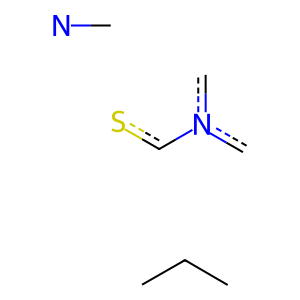

In [94]:
image

In [ ]:
# more tests
smiles_fragments = [
    'Cc1nnc2n1',
    'c1sc(CCC(=O)N3CCOCC3)cc1',
    'C(c1ccccc1Cl)=NC2'
]

for frag in smiles_fragments:
    mol = try_kekulize(frag)


In [96]:
# Creating MolTree instances and appending to MolTree list
smiles_list = dataset[:][0]
jt_list = []

for smiles in smiles_list:
    mol_tree = MolTree(smiles)
    jt_list.append(mol_tree)
    
# Printing number of nodes
print("Number of nodes:", mol_tree.size())
print("Number of JTs:", jt_list.size())

# Recovering molecular structure
# mol_tree.recover()

# Assembling candidate structures
#mol_tree.assemble()

# Accessing individual nodes
for node in mol_tree.nodes:
    print("Node clique:", node.clique)

# accessing indiv JTs
for jt in jt_list:
    print(jt)


Atoms in clique: [0, 1]
Atoms in clique: [1, 2]
Atoms in clique: [2, 3]
Atoms in clique: [8, 9]
Atoms in clique: [9, 10]
Atoms in clique: [9, 11]
Atoms in clique: [9, 12]
Atoms in RDKit _vectint: [3, 15, 14, 6, 5, 4]
Atoms in RDKit _vectint: [7, 6, 14, 13, 8]
Atoms in clique: [9]
Atoms in clique: [0, 1]
Atoms in clique: [1, 2]
Atoms in clique: [3, 4]
Atoms in clique: [6, 7]
Atoms in clique: [13, 14]
Atoms in RDKit _vectint: [2, 3, 5, 6, 13]
Atoms in RDKit _vectint: [8, 9, 10, 11, 12, 7]
Atoms in clique: [0, 1]
Atoms in clique: [1, 2]
Atoms in clique: [2, 3]
Atoms in clique: [19, 20]
Atoms in RDKit _vectint: [2, 4, 5, 6, 19]
Atoms in RDKit _vectint: [8, 9, 10, 15, 16, 7]
Atoms in RDKit _vectint: [11, 12, 13, 14, 15, 10]
Atoms in RDKit _vectint: [17, 18, 19, 6, 7, 16]
Atoms in clique: [2]
Atoms in clique: [0, 1]
Atoms in clique: [1, 2]
Atoms in clique: [2, 3]
Atoms in clique: [3, 4]
Atoms in clique: [4, 5]
Atoms in clique: [3, 6]
Atoms in clique: [6, 7]
Atoms in clique: [7, 8]
Atoms in c

KekulizeException: Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 9 10 11 24 25 26 27 28 29 31 40

## Convert Junction Trees to DGLGraph

In [139]:
len(jt_list)

7716

In [143]:
import dgl
from dgl import DGLGraph
import torch

def moltree_to_dglgraph(moltree):
    # Initialize a new DGLGraph
    g = DGLGraph()

    # Add nodes to the graph
    num_nodes = len(moltree.nodes)
    g.add_nodes(num_nodes)

    # Add edges to the graph
    src = []
    dst = []
    for edge in moltree.edges:
        src.append(edge[0])
        dst.append(edge[1])
    g.add_edges(src, dst)
    g.add_edges(dst, src)  # Add reverse edges since the graph is undirected

    # Assign node features
    # For this example, we will use a dummy feature. You should replace this with actual features.
    node_features = []
    for node in moltree.nodes:
        node_features.append([len(node.clique)])  # Example feature: size of the clique
    node_features = torch.tensor(node_features, dtype=torch.float32)
    g.ndata['h'] = node_features

    # Assign edge features if needed
    # For this example, we will use a dummy feature. You should replace this with actual features.
    num_edges = len(src) * 2  # Account for the reverse edges

    # dummy edge features
    edge_features = [[1.0] for _ in range(num_edges)]  # Example feature: bond type (dummy value)
    edge_features = torch.tensor(edge_features, dtype=torch.float32)
    g.edata['w'] = edge_features

    return g

# Example usage
# Assuming `mol_tree` is a MolTree object
jt_dgl_graph_list = [moltree_to_dglgraph(jt) for jt in jt_list]
# jt_dgl_graph = moltree_to_dglgraph(mol_tree)


In [144]:
len(jt_dgl_graph_list)

7716

In [145]:
jt_dgl_graph_list[0]

Graph(num_nodes=10, num_edges=18,
      ndata_schemes={'h': Scheme(shape=(1,), dtype=torch.float32)}
      edata_schemes={'w': Scheme(shape=(1,), dtype=torch.float32)})

In [ ]:
type(jt_dgl_graph)

In [ ]:
jt_dgl_graph.ndata

In [ ]:
jt_dgl_graph.edata

In [ ]:
dir(jt_dgl_graph)

In [ ]:
list(jt_dgl_graph.all_edges())

In [ ]:
# list(jt_dgl_graph.nodes)

In [ ]:
tree_decomp(mol)

In [ ]:
# Creating a MolTree instance
smiles = dataset[:][0]
mol_tree = MolTree(smiles)

# Printing number of nodes
print("Number of nodes:", mol_tree.size())

# Recovering molecular structure
# mol_tree.recover()

# Assembling candidate structures
#mol_tree.assemble()

# Accessing individual nodes
for node in mol_tree.nodes:
    print("Node clique:", node.clique)


In [ ]:
dir(mol_tree)

In [ ]:
dir(dgl)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph for junction tree
jtree = nx.Graph()

# Add nodes for each clique
for i, clique in enumerate(mol_tree.cliques):
    jtree.add_node(i, label=f"Clique {i}", atoms=clique)
    
# Add edges based on the separators (edges)
for x, y in mol_tree.edges:
    jtree.add_edge(x, y)

# Draw the junction tree
pos = nx.spring_layout(jtree)  # or use other layout algorithms such as circular_layout 
nx.draw(jtree, pos=pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
labels = nx.get_edge_attributes(jtree, 'weight')  # if weights are available
nx.draw_networkx_edge_labels(jtree, pos, edge_labels=labels)

plt.title("Junction Tree")
plt.show()


<h1 style="font-size:3rem;color:orange">Preprocessing data for gSpan</h1>

In [ ]:
from typing import Dict, List, Optional, Tuple
from rdkit import Chem
from tqdm import tqdm

In [ ]:
# def create_junction_tree_dataset(mols):
# #     mols: List[Chem.rdchem.Mol],
# # ) -> Tuple[List[tuple], Dict[str, int]]:
#     """preprocess jucntion tree molecules to gSpan dataset.

#     :param mols:
#     :return:
#     """
#     tuple_list = []
#     cnt = 0
#     smiles2id = defaultdict()
#     for idx, mol in enumerate(tqdm(mols)):
#         smile = Chem.MolToSmiles(mol)
#         mt = MolTree(smile)
#         n_lab = defaultdict()
#         for i, node in enumerate(mt.nodes):
#             # node.smiles = node.smiles + str(":") + str(node.clique)
#             n_lab[i] = node.smiles
#             if node.smiles not in smiles2id:
#                 smiles2id[node.smiles] = cnt
#                 cnt += 1

#         # TODO: ADD EDGE LABEL, IONIZATION
#         edge_list = [1 for _ in range(len(mt.edges))]
#         node_list = [smiles2id[x.smiles] for x in mt.nodes]

#         s_id = ("t", "#", str(idx))
#         s_end = ("t", "#", "-1")
#         tuple_list.extend([s_id])
#         for i, n_label in enumerate(node_list):
#             # print("v", i, n_label)
#             tuple_list.append(("v", i, n_label))

#         edges_list = []
#         for (l, r), e_label in zip(mt.edges, edge_list):
#             # print("e", l, r, edgelabel)
#             edges_list.append(("e", l, r, e_label))

#         tuple_list.extend(edges_list)

#     tuple_list.extend([s_end])

#     return tuple_list, smiles2id


In [ ]:
from rdkit import Chem
from collections import defaultdict
from tqdm import tqdm

def create_junction_tree_dataset(mols):
    """Preprocess junction tree molecules to gSpan dataset.

    :param mols: List[Chem.rdchem.Mol]
    :return: Tuple[List[tuple], Dict[str, int]]
    """
    tuple_list = []
    cnt = 0
    smiles2id = defaultdict()
    for idx, mol in enumerate(tqdm(mols)):
        if mol is None:
            print(f"Warning: Molecule at index {idx} is None")
            continue

        try:
            smile = Chem.MolToSmiles(mol)
            mt = MolTree(smile)
        except Exception as e:
            print(f"Error processing molecule at index {idx}: {e}")
            continue

        n_lab = defaultdict()
        for i, node in enumerate(mt.nodes):
            n_lab[i] = node.smiles
            if node.smiles not in smiles2id:
                smiles2id[node.smiles] = cnt
                cnt += 1

        # TODO: ADD EDGE LABEL, IONIZATION
        edge_list = [1 for _ in range(len(mt.edges))]
        node_list = [smiles2id[x.smiles] for x in mt.nodes]

        s_id = ("t", "#", str(idx))
        s_end = ("t", "#", "-1")
        tuple_list.extend([s_id])
        for i, n_label in enumerate(node_list):
            tuple_list.append(("v", i, n_label))

        edges_list = []
        for (l, r), e_label in zip(mt.edges, edge_list):
            edges_list.append(("e", l, r, e_label))

        tuple_list.extend(edges_list)

    tuple_list.extend([s_end])

    return tuple_list, smiles2id

# Ensure the dataset is not empty and all molecules are valid
mol_list = []
for i, smiles in enumerate(dataset):
    mol = Chem.MolFromSmiles(smiles[0])
    if mol is None:
        print(f"Warning: Invalid SMILES at index {i}: {smiles[0]}")
    mol_list.append(mol)

# Call the function with the prepared mol_list
create_junction_tree_dataset(mol_list)



In [ ]:
# turn entire dataset of smiles into RDKit mols
mol_list = []
for i in range(len(dataset)):
    mol = Chem.MolFromSmiles(dataset[i][0])
    mol_list.append(mol)

In [ ]:
print(mol_list)

In [ ]:
from tqdm import tqdm
from collections import defaultdict
from rdkit import Chem

In [ ]:
type(mol_list)

In [ ]:
create_junction_tree_dataset(mol_list)

In [ ]:
# redo and compare
create_junction_tree_dataset(mol_list)

In [ ]:
def save_jt_dataset(mols, sname):
    """Save junction tree dataset for gSpan from Mols.

    :param mols:
    :param sname:
    :return:
    """
    tup_list, smiles2id = create_junction_tree_dataset(mols)
    id2smiles = {v: k for k, v in smiles2id.items()}
    
    # Convert sname to a Path object
    sname_path = Path(sname)
    
    # save gSpan data
    save_graph(tup_list, sname_path)

    # save vocabulary (node labels of cliques in JT) for reconstruction.
    pd.DataFrame.from_dict(id2smiles, orient="index", columns=["smiles"]).to_csv(
        f"{sname}vocab.csv"
    )

In [ ]:
from pathlib import Path

In [ ]:
def save_graph(tuple_list, fpath: Path) -> None:
    """save gSpan data.

    :param tuple_list:
    :param fpath:
    :return:
    """
    with fpath.open(mode="w") as f:
        for var_s in tuple_list:
            for var in var_s:
                f.write(str(var))
                f.write(" ")
            f.write("\n")
        print(f"save to {fpath}")

In [ ]:
save_jt_dataset(mol_list, "REU_2024.txt")

<h1 style="font-size:3rem;color:orange">gSpan</h1>

In [ ]:
import collections
import os
import pickle
from collections import Counter
from dataclasses import dataclass
from pathlib import Path
from typing import List, Optional

import numpy as np
import pandas as pd
import rdkit.Chem as Chem
from matplotlib import pyplot as plt
from mi_collections.chemutils import (
    get_mol,
    get_smiles,
    mol_from_graph,
    mol_to_graph,
    mutag_convert,
    sanitize,
)
from mi_collections.ecfp.features import get_identifier
from mi_collections.gspan import gSpan
from mi_collections.gspan.config import parser
from mi_collections.gspan.main import main
from mi_collections.gspan.utils import (
    create_gspan_dataset_nx,
    gspan_to_mol,
    preprocess_mols,
)
from rdkit.Chem import Draw, Mol

In [ ]:
def _report(self, projected):
        self._report_df = pd.DataFrame()
        self._frequent_subgraphs = [] 
        self.ggnx = []  

        self._frequent_subgraphs.append(copy.copy(self._DFScode))
        if self._DFScode.get_num_vertices() < self._min_num_vertices:
            return
        g = self._DFScode.to_graph(
            gid=next(self._counter), is_undirected=self._is_undirected
        )
        display_str = g.display()
        gx, vlbs, elbs = g.get_result()
        self.ggnx.append({"graph": gx, "vlbs": vlbs, "elbs": elbs, "g": g})
        # print('\nSupport: {}'.format(self._support))

        # Add some report info to pandas dataframe "self._report_df".
        ids = ",".join(map(str, self._ids))
        self._report_df = self._report_df.append(
            pd.DataFrame(
                {
                    "support": [self._support],
                    "description": [display_str],
                    "num_vert": self._DFScode.get_num_vertices(),
                    "support_ids": ids,
                },
                index=[int(repr(self._counter)[6:-1])],
            )
        )
        
         # Concatenate the current report data with the existing DataFrame
        self._report_df = pd.concat([self._report_df, report_data], ignore_index=True)
        
        if self._where:
            pass

In [ ]:
@dataclass
class DefaultConfig:
    data_path: Path
    support: int = 1
    lower: int = 2
    upper: int = 4
    directed: bool = False
    is_save: bool = True
    output_csv: bool = False
    method: str = "raw"


def check_substructures(path, max_nums=100, **kwargs):
    df = pd.read_csv(path, index_col=0)
    sub_mols = [Chem.MolFromSmiles(s) for s in df["0"]]
    Draw.MolsToGridImage(sub_mols[0:max_nums], **kwargs).show()


def get_matrix(report_df, wl_kernel, y):
    ncols = report_df.shape[0]
    nums = report_df.to_numpy()
    mat = np.zeros((len(y), ncols))
    for i in range(ncols):
        cnt = Counter(nums[i].split(","))
        for key, val in cnt.items():
            mat[int(key), i] = val

    mat = np.array(mat)
    X = np.c_[wl_kernel.X[0].X.toarray(), mat]
    return X


class GraphMining:
    def __init__(self, config: DefaultConfig):
        self.config = config
        self.save_name = None

    def _run_gspan(self):
        args_str = (
            f"-s {self.config.support} -d {self.config.directed} -l {self.config.lower} -u {self.config.upper} "
            f"-p False -w False {self.config.data_path}"
        )
        FLAG, _ = parser.parse_known_args(args=args_str.split())
        result = main(FLAG)
        return result

    def decompose(self, graphs):
        if any(graphs):
            create_gspan_dataset_nx(nx_graphs=graphs)
        gspan_object = self._run_gspan()
        return gspan_object


class MolsMining(GraphMining):
    def __init__(self, config: DefaultConfig):
        super(MolsMining, self).__init__(config=config)
        self.config = config
        self.save_name = None

    def decompose(self, mols: Optional[List[Mol]] = None) -> gSpan:
        if any(mols):
            preprocess_mols(
                mols, fname=self.config.data_path, method=self.config.method
            )

        gspan_object = self._run_gspan()
        if self.config.is_save:
            self.save_csv(gspan_object=gspan_object, mols=mols)

        return gspan_object

    def save_csv(
        self,
        gspan_object: gSpan,
        mols: Optional[List[Mol]] = None,
        suffix: str = ".pickle",
    ):
        cnf = self.config
        save_name = (
            f"{cnf.data_path.name.split('.')[0]}_s{cnf.support}l{cnf.lower}u{cnf.upper}"
        )

        self.save_name = save_name

        # Save as CSV
        smiles = [get_smiles(m) for m in mols]
        sub_mols = self.gspan_to_mols(gspan_object, smiles_list=smiles)
        sub_smiles = [get_smiles(m) for m in sub_mols]
        pd.DataFrame(sub_smiles).to_csv(
            cnf.data_path.with_name(save_name).with_suffix(".csv")
        )
        gspan_object._report_df["support_ids"].to_csv(
            cnf.data_path.with_name(f"{save_name}_info.csv")
        )

    def gspan_to_mols(self, gspan: gSpan, smiles_list: Optional[List[str]] = None):
        return gspan_to_mol(gspan, self.config.method, smiles_list=smiles_list)

    # @staticmethod
    # def save(fpath: Path, obj: gSpan):
    #     with fpath.open("wb") as f:
    #         pickle.dump(obj, f)

    @staticmethod
    def save(fpath: Path, obj: gSpan):
        # Ensure the directory exists
        if not fpath.parent.exists():
            fpath.parent.mkdir(parents=True, exist_ok=True)

        # Save the object
        with fpath.open("wb") as f:
            pickle.dump(obj, f)

    # @staticmethod
    # def load(fpath):
    #     with fpath.open("rb") as f:
    #         obj = pickle.load(f)
    #     return obj

    #  @staticmethod
    # def load(fpath):
    #     print(f"Loading gSpan object from {fpath}")
    #     with fpath.open("rb") as f:
    #         obj = pickle.load(f)
    #     return obj
    @staticmethod
    def load(fpath):
        print(f"Attempting to load from {fpath}")
        if not fpath.exists():
            # Check if a CSV version of the file exists
            csv_path = fpath.with_suffix('.csv')
            if csv_path.exists():
                print(f"Loading CSV version of the file from {csv_path}")
                return pd.read_csv(csv_path)
            else:
                raise FileNotFoundError(f"Neither {fpath} nor {csv_path} exist.")
        with fpath.open("rb") as f:
            obj = pickle.load(f)
        return obj

In [ ]:
if __name__ == "__main__":
    test_smiles = [
        "CC1CCC2=CC=CC=C2O1",
        "CC",
        "COC",
        "c1ccccc1",
        "CC1C(=O)NC(=O)S1",
        "CO",
    ]
    test_mols = [get_mol(s) for s in test_smiles]

    cnf = DefaultConfig(data_path=Path("outputs/tests/gspan_jt.data"), method="jt")
    # runner = MolsMining(config=cnf)
    # # gspan_obj = runner._run_gspan()
    # gspan_obj = runner.decompose(test_mols)
    # runner.save(Path("outputs/test/gspan_jt.pickle"), gspan_obj)
    # test = runner.load(cnf.data_path.with_name(runner.save_name))
    # runner = MolsMining(config=cnf)
    # gspan_obj = runner.decompose(test_mols)
    # save_path = Path("outputs/test/gspan_jt.pickle")
    # runner.save(save_path, gspan_obj)
    
    # load_path = cnf.data_path.with_name(runner.save_name)
    # print(f"Attempting to load from {load_path}")
    # test = runner.load(load_path)

    runner = MolsMining(config=cnf)
    gspan_obj = runner.decompose(test_mols)
    save_path = Path("outputs/test/gspan_jt.pickle")
    runner.save(save_path, gspan_obj)
    
    load_path = cnf.data_path.with_name(runner.save_name)
    print(f"Attempting to load from {load_path}")
    test = runner.load(load_path)

    sub_mols = gspan_to_mol(gspan_obj, method=cnf.method, smiles_list=test_smiles)
    sub_smiles = [get_smiles(m) for m in sub_mols]

    dat, info = get_identifier(test_mols[0], radius=2)
    dat = pd.DataFrame(dat).T.to_numpy().flatten()
    dat = [d for d in dat if d is not None]
    cd = collections.Counter(dat)
    ds = np.unique(dat)

In [ ]:
df = pd.DataFrame()

In [ ]:
dir(df)

In [ ]:
# !pip install --upgrade pandas


<h1 style="font-size:3rem;color:orange">Adjacency Matrix</h1>

## Unweighted adjacency matrix 

In [ ]:
# !pip install pysmiles

In [ ]:
# from pysmiles import read_smiles
# import networkx as nx
# import numpy as np 

# smiles = dataset[0][0]
# mol = read_smiles(smiles) 

# print(mol.nodes(data='element'))
# print(mol.edges(data='weight'))

# # Adjacency matrix
# adj_matrix = nx.to_numpy_array(mol)
# print(adj_matrix)

## Weighted adjacency matrix

In [ ]:
# from rdkit import Chem

# # Your RDKit mol object
# mol = Chem.MolFromSmiles(dataset[0][0])

# # Generate the molecule's adjacency matrix with bond order 
# G = Chem.GetAdjacencyMatrix(mol, useBO=True)

# # Convert the weighted adjacency matrix to a NumPy array
# adjacency_matrix = np.asarray(G)

# # Print the weighted adjacency matrix
# print(adjacency_matrix)

# # Convert weighted adjacency matrix to NetworkX graph
# G = nx.from_numpy_array(adjacency_matrix)
# nx.draw(G, with_labels=True)


In [ ]:
# import dgl

# # Assuming you have an existing DGLGraph `dgl_graph` with nodes and unweighted edges
# dgl_graph = dataset[0][1]
# # Example edge weights (replace this with your actual edge weights)
# edge_weights = G 

# # Add edge weights to DGLGraph
# dgl_graph.edata['weight'] = torch.tensor(edge_weights)  # Use torch.tensor for compatibility with DGL

# # Optionally, print or inspect edge weights
# print(dgl_graph.edata['weight'])


# Apply GCN for node classification

In [ ]:
# from dgl.nn import GraphConv
# class GCN(nn.Module):
#     #the __init__ method is the constructor for the class. 
#     #Whenever an object of this class is instantiated, the __init__ method is executed immediately, setting up the initial state of the object.
#     def __init__(self, in_feats, h_feats, num_classes): 
#         #This line calls the constructor of the parent class (nn.Module). 
#         #This is essential for ensuring that the underlying PyTorch functionalities tied to the nn.Module class are properly initialized for the GraphConv class.
#         super(GCN, self).__init__() 
#         self.conv1 = GraphConv(in_feats, h_feats)
#         self.conv2 = GraphConv(h_feats, num_classes)

#     def forward(self, g, in_feat):
#         h = self.conv1(g, in_feat)
#         h = F.relu(h)
#         h = self.conv2(g, h)
#         print(h.shape)
#         return h


# # Create the model with given dimensions
# model = GCN(h.ndata['h'].shape[1], 16, 2)

In [ ]:
# dataset[0][2][2]

In [ ]:
# def train(g, model):
#     optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
#     best_val_acc = 0
#     best_test_acc = 0

#     features = h.ndata['h']
#     labels = dataset[0][2][0]
#     #train_mask = g.ndata["train_mask"]
#     #val_mask = g.ndata["val_mask"]
#     #test_mask = g.ndata["test_mask"]
#     for e in range(100):
#         # Forward
#         logits = model(g, features)
#         print(logits)
        
#         '''
#         # Compute prediction
#         pred = logits.argmax(1)

#         # Compute loss
#         # Note that you should only compute the losses of the nodes in the training set.
#         loss = F.cross_entropy(logits[train_mask], labels[train_mask])

#         # Compute accuracy on training/validation/test
#         train_acc = (pred[train_mask] == labels[train_mask]).float().mean()
#         val_acc = (pred[val_mask] == labels[val_mask]).float().mean()
#         test_acc = (pred[test_mask] == labels[test_mask]).float().mean()

#         # Save the best validation accuracy and the corresponding test accuracy.
#         if best_val_acc < val_acc:
#             best_val_acc = val_acc
#             best_test_acc = test_acc

#         # Backward
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         if e % 5 == 0:
#             print(
#                 f"In epoch {e}, loss: {loss:.3f}, val acc: {val_acc:.3f} (best {best_val_acc:.3f}), test acc: {test_acc:.3f} (best {best_test_acc:.3f})"
#             )


# model = GCN(g.ndata['atomic'].shape[1], 16, 2)
# train(g, model)
#         '''
        

In [ ]:
# model = GCN(h.ndata['h'].shape[1], 16, 2)
# train(g, model)

# Apply GCN for graph classification

In [ ]:
# dir(dataset)

In [ ]:
#print("Node feature dimensionality:", dataset.dim_nfeats)
#print("Number of graph categories:", dataset.gclasses)


from dgl.dataloading import GraphDataLoader

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler

# num_examples = len(dataset)
# num_train = int(num_examples * 0.8)
# num_val = int(num_examples * 0.1)
# num_test = num_examples - num_train - num_val

# train_sampler = SubsetRandomSampler(torch.arange(num_train))
# val_sampler = SubsetRandomSampler(torch.arange(num_train, num_train+num_val))
# test_sampler = SubsetRandomSampler(torch.arange(num_val, num_examples))

# train_dataloader = GraphDataLoader(
#     dataset, sampler=train_sampler, batch_size=32, drop_last=False
# )

# val_dataloader = GraphDataLoader(
#     dataset, sampler=val_sampler, batch_size=32, drop_last=False
# )

# test_dataloader = GraphDataLoader(
#     dataset, sampler=test_sampler, batch_size=32, drop_last=False
# )

In [ ]:
# it = iter(train_dataloader)
# batch = next(it)
# print(batch)

# #Number of batches 
# print(len(it))

# #Length of each batch 
# print(len(batch))

In [ ]:
# SMILES_string, batched_graph, labels, masks = batch
# print('graph: ', batched_graph)
# print(
#     "Number of nodes for each graph element in the batch:",
#     batched_graph.batch_num_nodes(),
# )
# print(
#     "Number of edges for each graph element in the batch:",
#     batched_graph.batch_num_edges(),
# )

# # Recover the original graph elements from the minibatch
# graphs = dgl.unbatch(batched_graph)

# print('graph: ', batched_graph)
# print("The original graphs in the minibatch:")
# print(graphs)

In [ ]:
# type(graphs)

In [ ]:
# type(batch)

In [ ]:
# batch[1]

In [ ]:
import dgl

# def add_self_loop_to_batch(batch):
#     # Unpack the batch tuple
#     SMILES_string, batched_graph, labels, masks = batch
    
#     # Extract each component graph
#     num_graphs = batched_graph.batch_size
#     graphs = dgl.unbatch(batched_graph)
    
#     # Add self-loops to all DGLGraphs in the batch
#     for i in range(num_graphs):
#         graphs[i] = dgl.add_self_loop(graphs[i])
    
#     # Recreate the batched graph from modified components
#     batched_graph = dgl.batch(graphs)
    
#     # Return the modified batch
#     return (SMILES_string, batched_graph, labels, masks)

In [ ]:
# print(type(batched_graph))
# print(batched_graph)
# #This means that batched_graph is just a big DGL graphs with sampled graphs as disconnected components. 

In [ ]:
# add_self_loop_to_batch(batch)

In [ ]:
from dgl.nn import GraphConv

# class GCN(nn.Module):
#     def __init__(self, in_feats, h_feats, num_classes):
#         super(GCN, self).__init__()
#         self.conv1 = GraphConv(in_feats, h_feats)
#         self.conv2 = GraphConv(h_feats, h_feats)
#         self.classify = nn.Linear(h_feats, num_classes)

# #     def forward(self, g, in_feat):
# #         h = self.conv1(g, in_feat)
# #         h = F.relu(h)
# #         h = self.conv2(g, h)
# #         g.ndata["h"] = h
# #         return dgl.mean_nodes(g, "h")

#     def forward(self, g):
#         h = g.ndata['h'].float()
#         h = F.relu(self.conv1(g, h))
#         h = self.conv2(g, h)
#         with g.local_scope():
#             g.ndata['h'] = h
#             hg = dgl.mean_nodes(g, 'h')
#         return self.classify(hg)


In [ ]:
# num_classes = dataset.labels.shape[1]
# print(num_classes)

In [ ]:
# list(train_dataloader)

In [ ]:
# # Create the model with given dimensions
# #model = GCN(in_feats, hidden_size, num_classes)
# model = GCN(74, 64, num_classes)   
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# #Training 
# num_epochs = 200

# criterion = nn.BCEWithLogitsLoss()

# for epoch in range(num_epochs):
#     for batch in train_dataloader:
#         batch = add_self_loop_to_batch(batch)
#         SMILES_string, batched_graph, labels, masks = batch
# #         print('labels: ', labels)
# #         print('g: ', batched_graph)
        
#         pred = model(batched_graph)
#         loss = criterion(pred, labels)   #F.cross_entropy(pred, labels)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
# #     print(loss)   

# # Validation loop
#     model.eval()
#     val_loss = 0.0
#     num_val_correct = 0
#     num_val_tests = 0

#     with torch.no_grad():
#         for batch in val_dataloader:
#             batch = add_self_loop_to_batch(batch)
#             SMILES_string, batched_graph, labels, masks = batch
#             logits = model(batched_graph)
#             val_loss += F.cross_entropy(logits, labels, reduction='sum').item()
            
#             preds = (logits > 0.5).float()
#             num_val_correct += (preds == labels).sum().item()
#             num_val_tests += labels.numel()

#     val_loss /= num_val_tests
#     val_accuracy = num_val_correct / num_val_tests
    
#     print(f"Epoch [{epoch + 1}/{num_epochs}], "
#           f"Train Loss: {loss.item():.4f}, "
#           f"Val Loss: {val_loss:.4f}, "
#           f"Val Accuracy: {val_accuracy:.4f}")

# # After training loop finishes, evaluate on test set
# model.eval()
# num_test_correct = 0
# num_test_tests = 0

# with torch.no_grad():
#     for batch in test_dataloader:
#         batch = add_self_loop_to_batch(batch)
#         SMILES_string, batched_graph, labels, masks = batch
#         logits = model(batched_graph)
#         preds = (logits > 0.5).float()
#         #preds = logits.argmax(dim=1)  #This generates a RuntimeError 
#         num_test_correct += (preds == labels).sum().item()
#         num_test_tests += labels.numel()

# test_accuracy = num_test_correct / num_test_tests
# print(f"Test Accuracy: {test_accuracy:.4f}")
    
# # num_correct = 0
# # num_tests = 0

# # for batch in test_dataloader:
# #     batch = add_self_loop_to_batch(batch)
# #     SMILES_string, batched_graph, labels, masks = batch
# #     logits = model(batched_graph, batched_graph.ndata['h'].float())
    
# #     #Thresholding logits using 0.5 to obtain binary predictions
# #     preds = (logits > 0.5).float()
# #     num_correct += (preds == labels).sum().item()
# #     num_tests += labels.numel()  # Can also use len(labels)

# # print("Test accuracy:", num_correct / num_tests)


In [ ]:
# print('pred size: ', preds.shape)
# print('labels size: ', labels.shape)